In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
min_samples_leaf = 3
n_estimators = 50
random_state = 42

In [4]:
data = load_wine()
X, y = data.data, data.target

In [ ]:
# DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=random_state)
score_dtc = cross_val_score(clf, X, y, cv=5)
print(f"Decision Tree Classifier Accuracy: {score_dtc.mean():.4f} ± {score_dtc.std():.4f}")

Decision Tree Classifier Accuracy: 0.8827 ± 0.0770


In [6]:
# BaggingClassifier
base_dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=random_state)
clf_bag = BaggingClassifier(
    estimator=base_dt,
    n_estimators=n_estimators,
    random_state=random_state
)

score_bag = cross_val_score(clf_bag, X, y, cv=5)
print(f"Bagging Classifier Accuracy: {score_bag.mean():.4f} ± {score_bag.std():.4f}")

Bagging Classifier Accuracy: 0.9387 ± 0.0443


In [7]:
# AdaBoostClassifier
stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=min_samples_leaf, random_state=random_state)
clf_ada = AdaBoostClassifier(
    estimator=stump,
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=random_state
)

score_ada = cross_val_score(clf_ada, X, y, cv=5)
print(f"AdaBoost Classifier Accuracy: {score_ada.mean():.4f} ± {score_ada.std():.4f}")

c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Classifier Accuracy: 0.9333 ± 0.0624


c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [9]:
# GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(
    n_estimators=n_estimators,
    learning_rate=1.0,
    subsample=0.5,
    max_depth=1,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state
)

score_gb = cross_val_score(clf_gb, X, y, cv=5)
print(f"Gradient Boosting Classifier Accuracy: {score_gb.mean():.4f} ± {score_gb.std():.4f}")


Gradient Boosting Classifier Accuracy: 0.9606 ± 0.0291


In [11]:
results = pd.DataFrame({
    'Classifier': [
        'DecisionTreeClassifier',
        'BaggingClassifier',
        'AdaBoostClassifier (SAMME)',
        'GradientBoostingClassifier'
    ],
    'Mean Accuracy': [
        score_dtc.mean(),
        score_bag.mean(),
        score_ada.mean(),
        score_gb.mean()
    ],
    'Std Dev': [
        score_dtc.std(),
        score_bag.std(),
        score_ada.std(),
        score_gb.std()
    ]
})
results.round(4)

,Classifier,Mean Accuracy,Std Dev
0,DecisionTreeClassifier,0.8827,0.0770
1,BaggingClassifier,0.9387,0.0443
2,AdaBoostClassifier (SAMME),0.9333,0.0624
3,GradientBoostingClassifier,0.9606,0.0291


C:\Users\Tomek\AppData\Local\Temp\ipykernel_19172\60574221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Classifier", y="Mean Accuracy", palette="viridis")


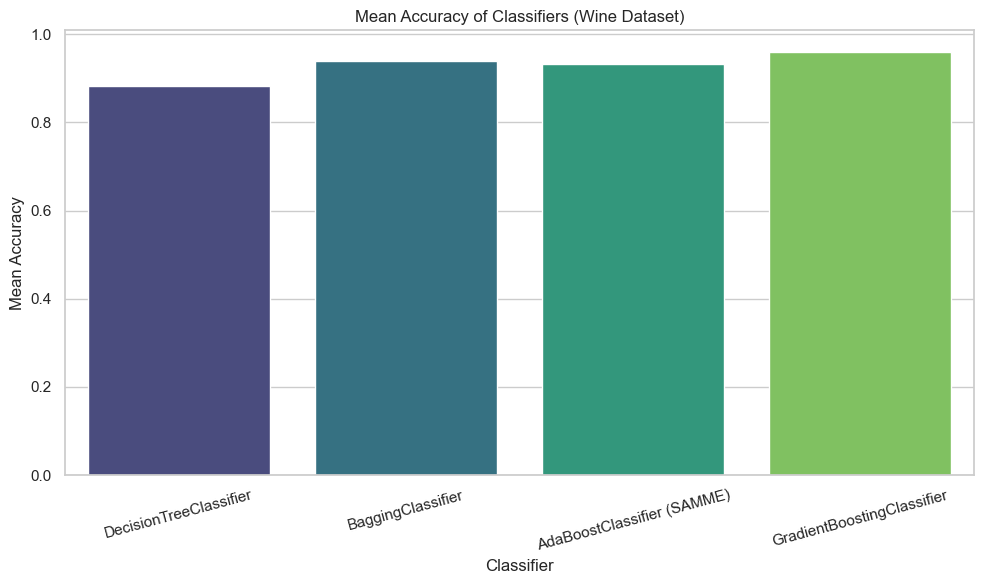

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=results, x="Classifier", y="Mean Accuracy", palette="viridis")

plt.title("Mean Accuracy of Classifiers (Wine Dataset)")
plt.ylabel("Mean Accuracy")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

C:\Users\Tomek\AppData\Local\Temp\ipykernel_19172\980628082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Classifier", y="Mean Accuracy", palette="viridis")


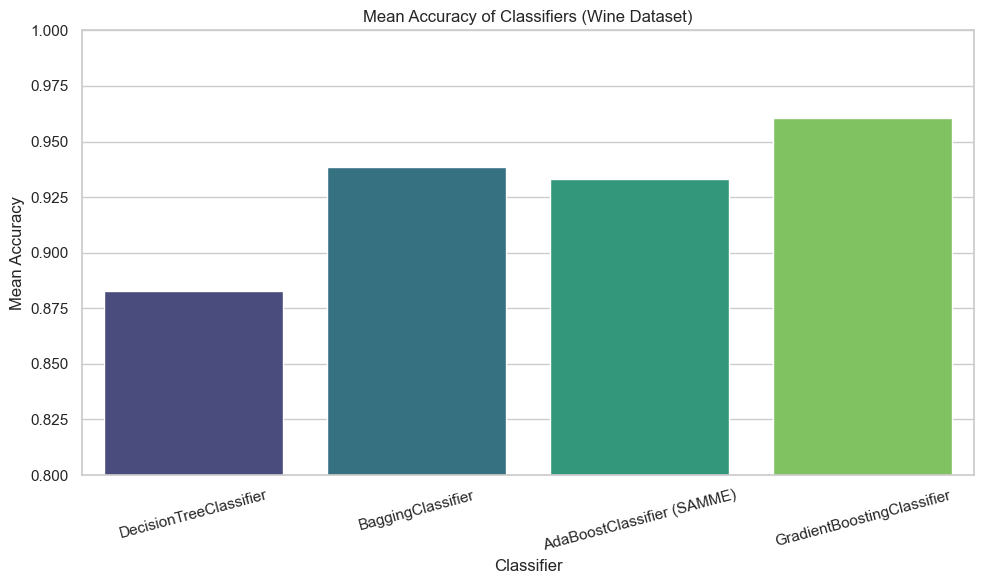

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x="Classifier", y="Mean Accuracy", palette="viridis")

plt.title("Mean Accuracy of Classifiers (Wine Dataset)")
plt.ylabel("Mean Accuracy")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()